In [ ]:
pip install tensorflow

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
path = '/content/drive/My Drive/AWEDataset/awe'
os.chdir(path)

In [ ]:
print(os.listdir(path))

['train.txt', 'distr.mat', 'test.txt', 'lefts.txt', 'rights.txt', '091', '099', '096', '093', '092', '100', '098', '097', '095', '094', '087', '084', '085', '083', '082', '081', '086', '090', '089', '088', '072', '071', '074', '079', '078', '080', '073', '075', '076', '077', '066', '065', '069', '067', '068', '064', '063', '062', '070', '061', '053', '055', '051', '057', '059', '054', '052', '056', '058', '060', '047', '046', '042', '048', '044', '045', '049', '043', '050', '041', '032', '036', '037', '033', '031', '040', '035', '038', '039', '034', '027', '029', '022', '025', '026', '030', '023', '021', '024', '028', '018', '020', '014', '019', '013', '012', '016', '015', '017', '011', '005', '004', '006', '010', '009', '001', '002', '003', '007', '008']


In [ ]:
file_path = []
for x in os.listdir(path):
    if os.path.isdir(x):
        data_path = os.path.join(path, x)
        file_path.append(data_path)
print(file_path[:5])  # Show first 5 for brevity

['/content/drive/My Drive/AWEDataset/awe/091', '/content/drive/My Drive/AWEDataset/awe/099', '/content/drive/My Drive/AWEDataset/awe/096', '/content/drive/My Drive/AWEDataset/awe/093', '/content/drive/My Drive/AWEDataset/awe/092']


In [ ]:
for x in os.listdir(file_path[0]):
    if x.split('.')[-1] == 'png':
        print(x)

02.png
08.png
04.png
03.png
05.png
06.png
10.png
01.png
07.png
09.png


In [ ]:
print(os.listdir(file_path[0]))

['02.png', '08.png', '04.png', 'annotations.json', '03.png', '05.png', '06.png', '10.png', '01.png', '07.png', '09.png']


In [ ]:
print(os.listdir(file_path[0]))

['02.png', '08.png', '04.png', 'annotations.json', '03.png', '05.png', '06.png', '10.png', '01.png', '07.png', '09.png']


In [ ]:
for i in range(len(file_path)):
    folder_name = file_path[i].split('/')[-1]
    count = len(os.listdir(file_path[i]))
    print(f"Folder-> {folder_name}")
    print(f"Count-> {count}\n")

Folder-> 091
Count-> 11

Folder-> 099
Count-> 11

Folder-> 096
Count-> 11

Folder-> 093
Count-> 11

Folder-> 092
Count-> 11

Folder-> 100
Count-> 11

Folder-> 098
Count-> 11

Folder-> 097
Count-> 11

Folder-> 095
Count-> 11

Folder-> 094
Count-> 11

Folder-> 087
Count-> 11

Folder-> 084
Count-> 11

Folder-> 085
Count-> 11

Folder-> 083
Count-> 11

Folder-> 082
Count-> 11

Folder-> 081
Count-> 11

Folder-> 086
Count-> 11

Folder-> 090
Count-> 11

Folder-> 089
Count-> 11

Folder-> 088
Count-> 11

Folder-> 072
Count-> 11

Folder-> 071
Count-> 11

Folder-> 074
Count-> 11

Folder-> 079
Count-> 11

Folder-> 078
Count-> 11

Folder-> 080
Count-> 11

Folder-> 073
Count-> 11

Folder-> 075
Count-> 11

Folder-> 076
Count-> 11

Folder-> 077
Count-> 11

Folder-> 066
Count-> 11

Folder-> 065
Count-> 11

Folder-> 069
Count-> 11

Folder-> 067
Count-> 11

Folder-> 068
Count-> 11

Folder-> 064
Count-> 11

Folder-> 063
Count-> 11

Folder-> 062
Count-> 11

Folder-> 070
Count-> 11

Folder-> 061
Count-> 11



In [ ]:
exists = os.path.exists('/content/drive/My Drive/AWEDataset/awe')


In [ ]:
gen_6 = ImageDataGenerator(rotation_range=3, horizontal_flip=True, fill_mode='nearest')
for path in file_path:
    for img_file in os.listdir(path):
        if img_file.split('.')[-1] == 'png':
            img_path = os.path.join(path, img_file)
            img = load_img(img_path)
            x = img_to_array(img)
            x = x.reshape((1,) + x.shape)
            prefix = path.split('/')[-1]
            i = 1
            for batch in gen_6.flow(x, batch_size=1, save_to_dir=path, save_prefix=prefix, save_format='png'):
                i += 1
                if i > 9:
                    break

In [ ]:
print(len(os.listdir(file_path[0])))

101


In [ ]:
import os
import shutil
import random

base_path = '/content/drive/My Drive/AWEDataset/awe'
output_dir = '/content/drive/My Drive/AWEDataset/awe/Split_Data'
train_dir = os.path.join(output_dir, 'train')
val_dir = os.path.join(output_dir, 'val')
test_dir = os.path.join(output_dir, 'test')

os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

print("Directories created:", os.listdir(output_dir))

Directories created: ['train', 'val', 'test']


In [ ]:
file_dict = {}
for folder in os.listdir(base_path):
    folder_path = os.path.join(base_path, folder)
    if os.path.isdir(folder_path):
        png_files = [f for f in os.listdir(folder_path) if f.endswith('.png')]
        file_dict[folder] = [os.path.join(folder_path, f) for f in png_files]

print(f"Total classes found: {len(file_dict)}")
print(f"Files in class 001: {len(file_dict.get('001', []))}")

Total classes found: 101
Files in class 001: 96


In [ ]:
random.seed(7)  # For reproducibility
train_files = []
val_files = []
test_files = []

for class_name, files in file_dict.items():
    random.shuffle(files)
    train_count = int(len(files) * 0.7)
    val_count = int(len(files) * 0.2)
    test_count = len(files) - train_count - val_count  # Remainder to test

    train_files.extend(files[:train_count])
    val_files.extend(files[train_count:train_count + val_count])
    test_files.extend(files[train_count + val_count:])

print(f"Train files: {len(train_files)}")
print(f"Val files: {len(val_files)}")
print(f"Test files: {len(test_files)}")

Train files: 6953
Val files: 1961
Test files: 1038


In [ ]:
for split_files, split_dir in [(train_files, train_dir), (val_files, val_dir), (test_files, test_dir)]:
    for file_path in split_files:
        class_name = file_path.split('/')[-2]  # Extract class (e.g., '001')
        dest_dir = os.path.join(split_dir, class_name)
        os.makedirs(dest_dir, exist_ok=True)
        shutil.copy(file_path, dest_dir)

print("Splitting complete!")
print(f"Train classes: {len(os.listdir(train_dir))}")
print(f"Files in train/001: {len(os.listdir(os.path.join(train_dir, '001')))}")

Splitting complete!
Train classes: 100
Files in train/001: 67


In [ ]:
print(f"Total train files: {sum(len(os.listdir(os.path.join(train_dir, d))) for d in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, d)))}")
print(f"Total val files: {sum(len(os.listdir(os.path.join(val_dir, d))) for d in os.listdir(val_dir) if os.path.isdir(os.path.join(val_dir, d)))}")
print(f"Total test files: {sum(len(os.listdir(os.path.join(test_dir, d))) for d in os.listdir(test_dir) if os.path.isdir(os.path.join(test_dir, d)))}")

Total train files: 6953
Total val files: 1961
Total test files: 1038


In [ ]:
train_path = '/content/drive/My Drive/AWEDataset/awe/Split_Data/train'
valid_path = '/content/drive/My Drive/AWEDataset/awe/Split_Data/val'
test_path = '/content/drive/My Drive/AWEDataset/awe/Split_Data/test'

print(os.listdir(train_path)[:5])  # Check first 5 class folders

['091', '099', '096', '093', '092']


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_gen = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg19.preprocess_input)
train_ds = train_gen.flow_from_directory(directory=train_path, target_size=(224, 224), batch_size=32)

valid_gen = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg19.preprocess_input)
valid_ds = valid_gen.flow_from_directory(directory=valid_path, target_size=(224, 224), batch_size=32)

test_gen = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg19.preprocess_input)
test_ds = test_gen.flow_from_directory(directory=test_path, target_size=(224, 224), batch_size=32, shuffle=False)

Found 6953 images belonging to 100 classes.
Found 1961 images belonging to 100 classes.
Found 1038 images belonging to 100 classes.


In [ ]:
# Assuming train_ds is already defined from your previous step
imgs, labels = next(train_ds)
print(f"Images shape: {imgs.shape}")
print(f"Labels shape: {labels.shape}")

Images shape: (32, 224, 224, 3)
Labels shape: (32, 100)


In [ ]:
import matplotlib.pyplot as plt

def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr[:10], axes):  # Limit to first 10 images
        # Reverse VGG19 preprocessing for display: add mean and clip to [0, 255]
        img_display = img + [123.68, 116.779, 103.939]  # VGG19 mean RGB values
        img_display = np.clip(img_display, 0, 255).astype(np.uint8)
        ax.imshow(img_display)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

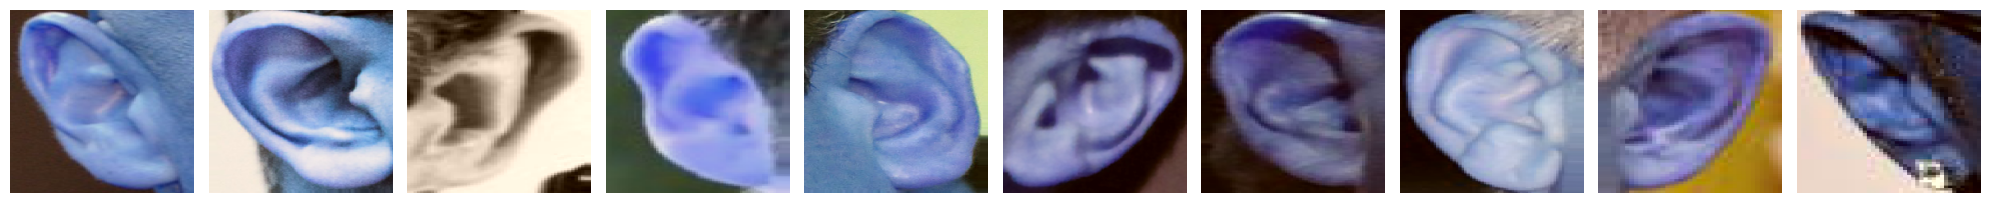

One-hot encoded labels:
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [ ]:
plotImages(imgs)
print("One-hot encoded labels:")
print(labels[:10])  # Print first 10 for brevity

In [ ]:
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout


In [ ]:
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


In [ ]:
base_model.trainable = False


In [ ]:
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))(x)
x = Dropout(0.5)(x)
x = Dense(10, activation='softmax')(x) # Change num_classes to 10

In [ ]:
model = Model(inputs=base_model.input, outputs=x)

In [ ]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1 (Conv2D)                       │ (None, 112, 112, 32)        │             864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_bn (BatchNormalization)        │ (None, 112, 112, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_relu (ReLU)                    │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1 (DepthwiseConv2D)          │ (None, 112, 112, 32)        │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_bn (BatchNormalization)    │ (None, 112, 112, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_relu (ReLU)                │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1 (Conv2D)                   │ (None, 112, 112, 64)        │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_bn (BatchNormalization)    │ (None, 112, 112, 64)        │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_relu (ReLU)                │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pad_2 (ZeroPadding2D)           │ (None, 113, 113, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2 (DepthwiseConv2D)          │ (None, 56, 56, 64)          │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_bn (BatchNormalization)    │ (None, 56, 56, 64)          │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_relu (ReLU)                │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2 (Conv2D)                   │ (None, 56, 56, 128)         │           8,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_bn (BatchNormalization)    │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_relu (ReLU)                │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3 (DepthwiseConv2D)          │ (None, 56, 56, 128)         │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_bn (BatchNormalization)    │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_relu (ReLU)                │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_3 (Conv2D)                   │ (None, 56, 56, 128)         │          16,384 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 3,910,692 (14.92 MB)

 Trainable params: 681,828 (2.60 MB)

 Non-trainable params: 3,228,864 (12.32 MB)

In [ ]:
from tensorflow.keras.optimizers import SGD
model.compile(
    optimizer=SGD(learning_rate=0.01, momentum=0.9),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
lr_schedule = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True, mode='max')

In [ ]:
import os
import re

path = "/content/drive/My Drive/AWEDataset/awe"
file_dict = {}
for folder in os.listdir(path):
    if re.match(r'^\d{3}$', folder):  # Only include folders with exactly three digits
        folder_path = os.path.join(path, folder)
        if os.path.isdir(folder_path):
            png_files = [f for f in os.listdir(folder_path) if f.endswith('.png')]
            file_dict[folder] = [os.path.join(folder_path, f) for f in png_files]

In [ ]:
file_dict_10 = {k: v for k, v in file_dict.items() if int(k) <= 10}
print(f"Total classes (10): {len(file_dict_10)}")
print(f"Files in 001: {len(file_dict_10.get('001', []))}")

Total classes (10): 10
Files in 001: 96


In [ ]:
import random

random.seed(7)  # For reproducibility
train_files = []
val_files = []
test_files = []

for class_name, files in file_dict_10.items():
    random.shuffle(files)  # Shuffle files within each class
    train_count = int(len(files) * 0.7)
    val_count = int(len(files) * 0.2)
    test_count = len(files) - train_count - val_count

    train_files.extend(files[:train_count])
    val_files.extend(files[train_count:train_count + val_count])
    test_files.extend(files[train_count + val_count:])

print(f"Train files: {len(train_files)}")
print(f"Val files: {len(val_files)}")
print(f"Test files: {len(test_files)}")

Train files: 693
Val files: 195
Test files: 104


In [ ]:
import shutil

output_dir = '/content/drive/My Drive/AWEDataset/awe/Split_Data'
train_dir = os.path.join(output_dir, 'train')
val_dir = os.path.join(output_dir, 'val')
test_dir = os.path.join(output_dir, 'test')

# Create directories if they don’t exist
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Copy files to their respective directories
for split_files, split_dir in [(train_files, train_dir), (val_files, val_dir), (test_files, test_dir)]:
    for file_path in split_files:
        class_name = file_path.split('/')[-2]  # Extract class name (e.g., '001')
        dest_dir = os.path.join(split_dir, class_name)
        os.makedirs(dest_dir, exist_ok=True)
        shutil.copy(file_path, dest_dir)
!ls "/content/drive/My Drive/AWEDataset/awe/Split_Data/train/001"

001_0_1038.png	001_0_2882.png	001_0_4961.png	001_0_6122.png	001_0_7687.png	001_0_9617.png
001_0_112.png	001_0_2883.png	001_0_5077.png	001_0_6221.png	001_0_7802.png	001_0_9776.png
001_0_133.png	001_0_2951.png	001_0_514.png	001_0_6291.png	001_0_7891.png	001_0_9901.png
001_0_1370.png	001_0_2967.png	001_0_5230.png	001_0_6318.png	001_0_7937.png	001_0_9959.png
001_0_1694.png	001_0_2982.png	001_0_5341.png	001_0_6450.png	001_0_793.png	01.png
001_0_1816.png	001_0_3147.png	001_0_535.png	001_0_6467.png	001_0_8361.png	02.png
001_0_1821.png	001_0_3243.png	001_0_5366.png	001_0_6502.png	001_0_8551.png	03.png
001_0_1908.png	001_0_3492.png	001_0_5410.png	001_0_6658.png	001_0_8579.png	04.png
001_0_1924.png	001_0_3666.png	001_0_55.png	001_0_7090.png	001_0_9040.png	06.png
001_0_2305.png	001_0_3960.png	001_0_564.png	001_0_7341.png	001_0_9327.png	07.png
001_0_2420.png	001_0_4124.png	001_0_5699.png	001_0_7365.png	001_0_9341.png	08.png
001_0_252.png	001_0_4498.png	001_0_5844.png	001_0_743.png	001_0_9383.png	1

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

# Training generator with augmentation (adjusted for MobileNet)
train_gen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet.preprocess_input,  # Changed to MobileNet preprocessing
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
# Validation and test generators (no augmentation, just preprocessing)
valid_gen = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input)
test_gen = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input)

# Create data flows
train_ds = train_gen.flow_from_directory(
    directory=train_dir,
    target_size=(224, 224),  # MobileNet input size
    batch_size=32,
    class_mode='categorical'
)

valid_ds = valid_gen.flow_from_directory(
    directory=val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)
test_ds = test_gen.flow_from_directory(
    directory=test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Keep order for evaluation
)



Found 7155 images belonging to 100 classes.
Found 2114 images belonging to 100 classes.
Found 1133 images belonging to 100 classes.


In [ ]:
import shutil
import os

output_dir = '/content/drive/My Drive/AWEDataset/awe/Split_Data'
train_dir = os.path.join(output_dir, 'train')
val_dir = os.path.join(output_dir, 'val')
test_dir = os.path.join(output_dir, 'test')

# Clear existing Split_Data
shutil.rmtree(output_dir, ignore_errors=True)

# Recreate directories
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)
# Copy files to their respective directories
for split_files, split_dir in [(train_files, train_dir), (val_files, val_dir), (test_files, test_dir)]:
    for file_path in split_files:
        class_name = file_path.split('/')[-2]  # Extract class name (e.g., '001')
        dest_dir = os.path.join(split_dir, class_name)
        os.makedirs(dest_dir, exist_ok=True)
        shutil.copy(file_path, dest_dir)
# Create data flows
train_ds = train_gen.flow_from_directory(
    directory=train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

valid_ds = valid_gen.flow_from_directory(
    directory=val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_ds = test_gen.flow_from_directory(
    directory=test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)


Found 693 images belonging to 10 classes.
Found 195 images belonging to 10 classes.
Found 104 images belonging to 10 classes.


In [ ]:
# Check the number of classes detected by the generator
print("Train classes:", train_ds.class_indices)
print("Number of train classes:", len(train_ds.class_indices))

# Check the shape of the labels
for imgs, labels in train_ds:
    print("Labels shape:", labels.shape)  # Should be (32, 10)
    break

Train classes: {'001': 0, '002': 1, '003': 2, '004': 3, '005': 4, '006': 5, '007': 6, '008': 7, '009': 8, '010': 9}
Number of train classes: 10
Labels shape: (32, 10)


In [ ]:
from tensorflow.keras.optimizers import SGD

model.compile(
    optimizer=SGD(learning_rate=0.01, momentum=0.9),  # Stochastic Gradient Descent
    loss='categorical_crossentropy',                  # Loss for categorical labels
    metrics=['accuracy']                              # Track accuracy during training
)

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
# Define callbacks
lr_schedule = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)  # Reduce learning rate if no improvement
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True) # Stop early if no improvement
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True, mode='max')  # Save best model
# Train the model
history = model.fit(
    train_ds,
    epochs=50,              # Maximum number of epochs
    validation_data=valid_ds,
    callbacks=[lr_schedule, early_stopping, checkpoint]
)


Epoch 1/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.1362 - loss: 12.9311

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


22/22 ━━━━━━━━━━━━━━━━━━━━ 70s 3s/step - accuracy: 0.1365 - loss: 12.9178 - val_accuracy: 0.4308 - val_loss: 11.6754 - learning_rate: 0.0100
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.2094 - loss: 11.7058

22/22 ━━━━━━━━━━━━━━━━━━━━ 58s 3s/step - accuracy: 0.2111 - loss: 11.6951 - val_accuracy: 0.5487 - val_loss: 10.6955 - learning_rate: 0.0100
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3524 - loss: 10.6440

22/22 ━━━━━━━━━━━━━━━━━━━━ 81s 3s/step - accuracy: 0.3515 - loss: 10.6368 - val_accuracy: 0.6308 - val_loss: 9.6883 - learning_rate: 0.0100
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3807 - loss: 9.7657

22/22 ━━━━━━━━━━━━━━━━━━━━ 80s 2s/step - accuracy: 0.3833 - loss: 9.7551 - val_accuracy: 0.7077 - val_loss: 8.6981 - learning_rate: 0.0100
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5068 - loss: 8.8268

22/22 ━━━━━━━━━━━━━━━━━━━━ 53s 2s/step - accuracy: 0.5073 - loss: 8.8190 - val_accuracy: 0.7641 - val_loss: 7.8356 - learning_rate: 0.0100
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6182 - loss: 7.9654

22/22 ━━━━━━━━━━━━━━━━━━━━ 56s 3s/step - accuracy: 0.6173 - loss: 7.9610 - val_accuracy: 0.8154 - val_loss: 7.1442 - learning_rate: 0.0100
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6511 - loss: 7.3296

22/22 ━━━━━━━━━━━━━━━━━━━━ 55s 3s/step - accuracy: 0.6513 - loss: 7.3238 - val_accuracy: 0.8410 - val_loss: 6.5383 - learning_rate: 0.0100
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - accuracy: 0.6667 - loss: 6.7606 - val_accuracy: 0.8359 - val_loss: 6.0488 - learning_rate: 0.0100
Epoch 9/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7234 - loss: 6.2266

22/22 ━━━━━━━━━━━━━━━━━━━━ 55s 2s/step - accuracy: 0.7230 - loss: 6.2226 - val_accuracy: 0.8667 - val_loss: 5.5571 - learning_rate: 0.0100
Epoch 10/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.7190 - loss: 5.7981 - val_accuracy: 0.8564 - val_loss: 5.1485 - learning_rate: 0.0100
Epoch 11/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7571 - loss: 5.3148

22/22 ━━━━━━━━━━━━━━━━━━━━ 53s 2s/step - accuracy: 0.7560 - loss: 5.3127 - val_accuracy: 0.9128 - val_loss: 4.7396 - learning_rate: 0.0100
Epoch 12/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 80s 2s/step - accuracy: 0.7508 - loss: 5.0356 - val_accuracy: 0.9026 - val_loss: 4.3986 - learning_rate: 0.0100
Epoch 13/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7862 - loss: 4.5972

22/22 ━━━━━━━━━━━━━━━━━━━━ 56s 2s/step - accuracy: 0.7873 - loss: 4.5929 - val_accuracy: 0.9333 - val_loss: 4.0382 - learning_rate: 0.0100
Epoch 14/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 54s 2s/step - accuracy: 0.7709 - loss: 4.3537 - val_accuracy: 0.9179 - val_loss: 3.7938 - learning_rate: 0.0100
Epoch 15/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 53s 2s/step - accuracy: 0.8276 - loss: 3.9385 - val_accuracy: 0.9077 - val_loss: 3.5532 - learning_rate: 0.0100
Epoch 16/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7905 - loss: 3.7750

22/22 ━━━━━━━━━━━━━━━━━━━━ 55s 2s/step - accuracy: 0.7917 - loss: 3.7704 - val_accuracy: 0.9436 - val_loss: 3.2325 - learning_rate: 0.0100
Epoch 17/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 55s 2s/step - accuracy: 0.7993 - loss: 3.5055 - val_accuracy: 0.9128 - val_loss: 3.0754 - learning_rate: 0.0100
Epoch 18/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 54s 2s/step - accuracy: 0.8665 - loss: 3.1845 - val_accuracy: 0.8872 - val_loss: 2.9357 - learning_rate: 0.0100
Epoch 19/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 54s 2s/step - accuracy: 0.8380 - loss: 3.0443 - val_accuracy: 0.9385 - val_loss: 2.6536 - learning_rate: 0.0100
Epoch 20/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 55s 3s/step - accuracy: 0.8483 - loss: 2.9087 - val_accuracy: 0.9385 - val_loss: 2.5578 - learning_rate: 0.0100
Epoch 21/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - accuracy: 0.8275 - loss: 2.7730 - val_accuracy: 0.8923 - val_loss: 2.3846 - learning_rate: 0.0100
Epoch 22/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8249 - loss: 2.6482

22/22 ━━━━━━━━━━━━━━━━━━━━ 55s 2s/step - accuracy: 0.8255 - loss: 2.6449 - val_accuracy: 0.9641 - val_loss: 2.2025 - learning_rate: 0.0100
Epoch 23/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8350 - loss: 2.4617

22/22 ━━━━━━━━━━━━━━━━━━━━ 56s 3s/step - accuracy: 0.8346 - loss: 2.4617 - val_accuracy: 0.9692 - val_loss: 2.0549 - learning_rate: 0.0100
Epoch 24/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 65s 3s/step - accuracy: 0.8505 - loss: 2.3402 - val_accuracy: 0.9385 - val_loss: 2.0687 - learning_rate: 0.0100
Epoch 25/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 54s 2s/step - accuracy: 0.8184 - loss: 2.2366 - val_accuracy: 0.9128 - val_loss: 1.9636 - learning_rate: 0.0100
Epoch 26/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 57s 3s/step - accuracy: 0.8344 - loss: 2.1164 - val_accuracy: 0.9333 - val_loss: 1.7601 - learning_rate: 0.0100
Epoch 27/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 55s 3s/step - accuracy: 0.8334 - loss: 2.0167 - val_accuracy: 0.9590 - val_loss: 1.6590 - learning_rate: 0.0100
Epoch 28/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 53s 2s/step - accuracy: 0.8272 - loss: 1.9845 - val_accuracy: 0.9538 - val_loss: 1.6300 - learning_rate: 0.0100
Epoch 29/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8300 - loss: 1.9438

22/22 ━━━━━━━━━━━━━━━━━━━━ 56s 3s/step - accuracy: 0.8305 - loss: 1.9408 - val_accuracy: 0.9744 - val_loss: 1.4944 - learning_rate: 0.0100
Epoch 30/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 64s 3s/step - accuracy: 0.8750 - loss: 1.7678 - val_accuracy: 0.9436 - val_loss: 1.4675 - learning_rate: 0.0100
Epoch 31/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 72s 3s/step - accuracy: 0.8403 - loss: 1.7883 - val_accuracy: 0.9590 - val_loss: 1.4184 - learning_rate: 0.0100
Epoch 32/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 80s 2s/step - accuracy: 0.8635 - loss: 1.6593 - val_accuracy: 0.9744 - val_loss: 1.3014 - learning_rate: 0.0100
Epoch 33/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 83s 2s/step - accuracy: 0.8639 - loss: 1.5616 - val_accuracy: 0.9436 - val_loss: 1.2993 - learning_rate: 0.0100
Epoch 34/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.8629 - loss: 1.5748 - val_accuracy: 0.9692 - val_loss: 1.2453 - learning_rate: 0.0100
Epoch 35/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 83s 3s/step - accuracy: 0.8479 - loss: 1.5433 - val_accuracy: 0.948

22/22 ━━━━━━━━━━━━━━━━━━━━ 55s 2s/step - accuracy: 0.8367 - loss: 1.3495 - val_accuracy: 0.9795 - val_loss: 0.9946 - learning_rate: 0.0100
Epoch 42/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - accuracy: 0.8223 - loss: 1.4126 - val_accuracy: 0.9641 - val_loss: 1.0071 - learning_rate: 0.0100
Epoch 43/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 53s 2s/step - accuracy: 0.8695 - loss: 1.2726 - val_accuracy: 0.9487 - val_loss: 1.0303 - learning_rate: 0.0100
Epoch 44/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - accuracy: 0.8404 - loss: 1.3141 - val_accuracy: 0.9692 - val_loss: 1.0140 - learning_rate: 0.0100
Epoch 45/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 53s 2s/step - accuracy: 0.8410 - loss: 1.2915 - val_accuracy: 0.9744 - val_loss: 0.9317 - learning_rate: 0.0100
Epoch 46/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8769 - loss: 1.2275

22/22 ━━━━━━━━━━━━━━━━━━━━ 83s 2s/step - accuracy: 0.8762 - loss: 1.2273 - val_accuracy: 0.9846 - val_loss: 0.8897 - learning_rate: 0.0100
Epoch 47/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 53s 2s/step - accuracy: 0.8530 - loss: 1.2571 - val_accuracy: 0.9795 - val_loss: 0.8625 - learning_rate: 0.0100
Epoch 48/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.8369 - loss: 1.2004 - val_accuracy: 0.9487 - val_loss: 0.8864 - learning_rate: 0.0100
Epoch 49/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - accuracy: 0.8095 - loss: 1.2422 - val_accuracy: 0.9641 - val_loss: 0.8779 - learning_rate: 0.0100
Epoch 50/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - accuracy: 0.8229 - loss: 1.2406 - val_accuracy: 0.9538 - val_loss: 0.8695 - learning_rate: 0.0100
